# Part 1 : Wikipedia Evolution

## How did change between 2007 and now ? 

In this part we investigate how Wikipedia evolved when compared to the 2007 version to the current one we use today. An interesting thought that occured to us was that the wikispeedia game was hard to play due to the not-so-up-to-date structure of the game. As players are using a restricted version from the 2007 Wikipedia data, this could also impact how the game is played. 

Before testing this hypothesis we first investigate how much it has changed between now and the 2024 version, to see if there is a significant difference. 

In the following part we will study  *only the 4587 articles* from the 2007 selection and compare them to their current corresponding version. 

### 1.1) Hyperlinks count 

We first look at the number of hyperlinks per page, as this is the factor the most suceptible to influence how the game is played. 


In [48]:
import pandas as pd
import numpy as np

import networkx as nx
import matplotlib.pyplot as plt

In [49]:
# Loading data

links2007 = pd.read_csv('data/wikispeedia_paths-and-graph/links.tsv', sep='\t', comment='#', names=['linkSource', 'linkTarget'])
links2024 = pd.read_csv('data/2024/links2024.csv')

In [50]:
links2007.sample(5)

,linkSource,linkTarget
31780,Double-decker_bus,New_Zealand
64550,List_of_Asian_countries,Armenia
88410,President_of_the_United_States,Chester_A._Arthur
118750,Yellow_River,Grand_Canal_of_China
39964,Florida,Autumn


In [51]:
(links2007.groupby(by='linkSource')).count()

,linkTarget
linkSource,
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,11
%C3%85land,19
%C3%89douard_Manet,20
%C3%89ire,8
%C3%93engus_I_of_the_Picts,10
...,...
Zionism,74
Zirconium,42
Zoroaster,28


In [52]:
(links2024.groupby(by='linkSource')).count()

,linkTarget
linkSource,
%C3%81ed%C3%A1n_mac_Gabr%C3%A1in,12
%C3%85land,127
%C3%89douard_Manet,60
%C3%89ire,37
%C3%93engus_I_of_the_Picts,21
...,...
Zion_National_Park,51
Zionism,69
Zirconium,259


links 2007 : 4587 source articles 
VS links 2024 : 4546 source articles 

### Problem of missing links in 2024 : find updated version ?? or take out from analysis the 2007 ones 

In [53]:
# For now we only use the articles appearing in both 2007 and 2024 as source 
# to have matching dimensions --> later on pull all the links missing in 2024

selected_articles = set(links2024['linkSource']).intersection(links2007['linkSource'])
links2007 = links2007.loc[links2007['linkSource'].isin(selected_articles)]
links2024 = links2024.loc[links2024['linkSource'].isin(selected_articles)]


In [54]:
# checking for matching dimensions : 
links2024.groupby(by='linkSource').count().shape == links2007.groupby(by='linkSource').count().shape

True

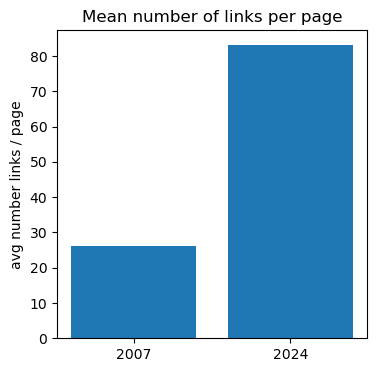

In [55]:
summary2007= (links2007.groupby(by='linkSource'))
summary2024= (links2024.groupby(by='linkSource'))

plt.figure(figsize=(4,4))
plt.bar(x=['2007', '2024'], height= [np.mean(summary2007.count()), np.mean(summary2024.count())])
plt.ylabel('avg number links / page')
plt.title('Mean number of links per page')
plt.show()

We can observe a big increase in the total average number of links in 2024, which is logical as the wikipedia database was greatly expanded (and is still expanding) between the two time points. Let us now look more into the details of how this expansion. 

In [ ]:
### T test to find wheter those two means are significantly different : 
# Null Hyp : the two means are not significantly different 
# Alt hyp : they are significantly different 

from scipy.stats import ttest_ind 

ttest_ind(summary2007.count(), summary2024.count())

# p value = 1.04 e-305 << alpha = 0.05, the two distributions have significantly different means

TtestResult(statistic=array([-38.8614243]), pvalue=array([1.04199522e-305]), df=array([9068.]))

We now compare the distribution of links per source articles : we want to check whether the two distributions of links to target articles per source articles is the same between 2007 and 2024. 

In [ ]:
# ax = sns.histplot(treated['re78'], kde=True, stat='density', color='blue', label='treated')
# ax = sns.histplot(control['re78'], kde=True, stat='density', color='orange', label='control')
# ax.set(title='Income distribution comparison in 1978',xlabel='Income 1978', ylabel='Income density')
# plt.legend()
# plt.show()

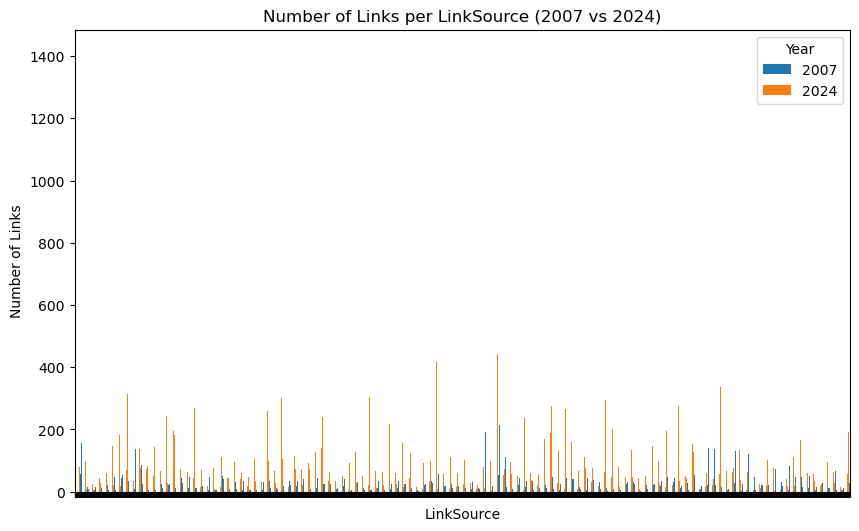

In [67]:
# Aggregate counts of links per linkSource for each year
count_2007 = summary2007.size()
count_2024 = summary2024.size()

# Create a DataFrame for easy plotting with both years' data
counts_df = pd.DataFrame({'2007': count_2007, '2024': count_2024})

# Plot the data
ax = counts_df.plot(kind='bar', figsize=(10, 6))
ax.set_title('Number of Links per LinkSource (2007 vs 2024)')
ax.set_xlabel('LinkSource')
ax.set_ylabel('Number of Links')
ax.set_xticklabels([])
plt.legend(title="Year")
plt.show()

log fold change plot instead ? 

In [ ]:
# could try to make nicer graph using sns

In [ ]:
# testing the two distributions are different

from scipy.stats import chi2_contingency

# Assuming data1 and data2 contain counts for each category
contingency_table = [summary2007.count(), summary2024.count()]
stat, p_value, _, _ = chi2_contingency(contingency_table)
p_value


0.0

### should verify if chi square is appropriate here

## 1.2) Shortest Path 

comment on fait 